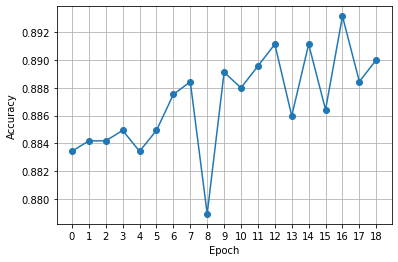

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('Model_accuracy.csv')

# 그래프 그리기
plt.plot(df.index, df.iloc[:, 0], marker='o')  # 각 record에 점 찍기
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(df.index)  # X눈금 간격을 1로 설정
plt.grid(True)
plt.show()


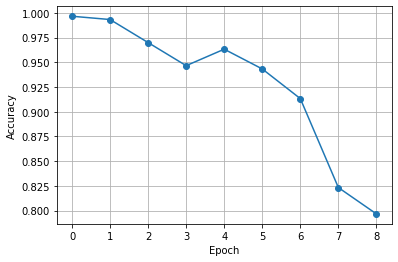

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('300,500 Uclid_distance.csv')

# 그래프 그리기
plt.plot(df.index, df.iloc[:, 0], marker='o')  # 각 record에 점 찍기
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


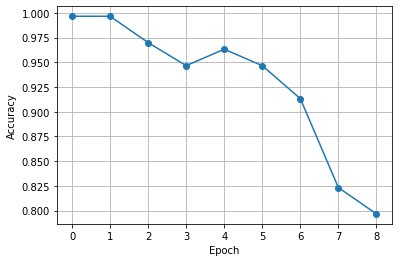

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('300,500 Cosine_simularity.csv')

# 그래프 그리기
plt.plot(df.index, df.iloc[:, 0], marker='o')  # 각 record에 점 찍기
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [12]:
# 로지스틱 리그리션 데이터 추출용
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def calculate_accuracy_and_distance(client_file, dictionary_file, original_file_client, original_file_dictionary, n=5):
    # 변환된 파일을 읽어옵니다.
    client_data = pd.read_csv(client_file)
    dictionary_data = pd.read_csv(dictionary_file)
    
    # 원본 파일을 읽어옵니다.
    original_client_data = pd.read_csv(original_file_client)
    original_dictionary_data = pd.read_csv(original_file_dictionary)
    
    # 데이터 포인트 간의 유클리드 거리를 계산합니다.
    distances = euclidean_distances(client_data.values, dictionary_data.values)
    
    # Top@n 유사도를 찾습니다.
    topn_similarities = np.argsort(distances, axis=1)[:, :n]
    topn_values = np.sort(distances, axis=1)[:, :n]
    
    # 결과를 저장할 데이터프레임 생성
    results_df = pd.DataFrame(columns=[f"Rank_{i+1}" for i in range(n)])  # 각 클라이언트의 서버 랭크별 점수를 저장할 데이터프레임

    for i, (indices, scores) in enumerate(zip(topn_similarities, topn_values)):
        result_row = pd.Series(scores, index=[f"Rank_{j+1}" for j in range(n)])  # 클라이언트의 서버 랭크별 점수 저장
        results_df = results_df.append(result_row, ignore_index=True)
    
    # 결과를 CSV 파일로 내보냅니다.
    results_df.to_csv(f"client_scores_{client_file.split('_')[-1]}", index=False, header=False)  # 첫 번째 행과 열의 이름을 빼고 저장

# 변환된 파일 경로
dictionary_file = "Dictionary_smashed_data.csv"

# 원본 파일 경로
original_file_client = "random_500_C.csv"
original_file_dictionary = "random_500_D.csv"

# Top n 설정
n = 5

# 정확도 계산 및 평균 거리 계산
for i in range(1, 11):
    client_file = f'Client_smashed_data_epoch{i}.csv'
    calculate_accuracy_and_distance(client_file, dictionary_file, original_file_client, original_file_dictionary, n)

Int64Index([0, 1, 2, 3, 4], dtype='int64')
DataFrame Rows: 500
Labels Length: 500
Logistic Accuracy: 0.45
SVM Accuracy: 0.49
[[11 43]
 [12 34]]


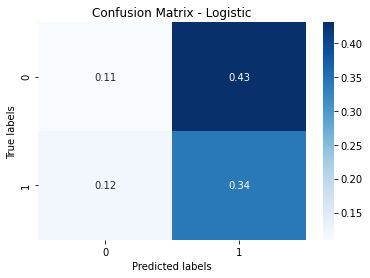

In [13]:
# 로지스틱 리그리션
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("client_scores_epoch10.csv", header=None)
print(df.columns)

# 열 이름 변경
new_columns = [f"Rank_{i+1}" for i in range(len(df.columns))]
df.columns = new_columns

# 데이터와 라벨 분리
X = df  # 첫 번째 열은 라벨이 아니므로 제외
y = [1] * 250 + [0] * 250  # 라벨 할당
print("DataFrame Rows:", len(df))
print("Labels Length:", len(y))
# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 초기화 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

svmreg = SVC()
svmreg.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

svm_pred = svmreg.predict(X_test)

# 정확도 출력
print("Logistic Accuracy:", accuracy_score(y_test, y_pred))
# 정확도 계산
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(confusion_matrix(y_test, y_pred))

# 로지스틱 결과의 confusion matrix 시각화
svm_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svm_cm*0.01, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic')
plt.show()

[[-0.55004915 -0.53761452 -0.53185766 -0.46382954 -0.45542631]
 [-0.74351322 -0.72032729 -0.71534238 -0.69333706 -0.68309229]
 [-0.40205846 -0.38957789 -0.36329794 -0.32919752 -0.32905084]
 ...
 [-0.76369373 -0.66727168 -0.65610331 -0.65469921 -0.64891985]
 [-1.06984367 -1.06750903 -1.03954199 -1.03600223 -1.01040759]
 [-0.60905838 -0.59734816 -0.59378728 -0.59194471 -0.58708891]]


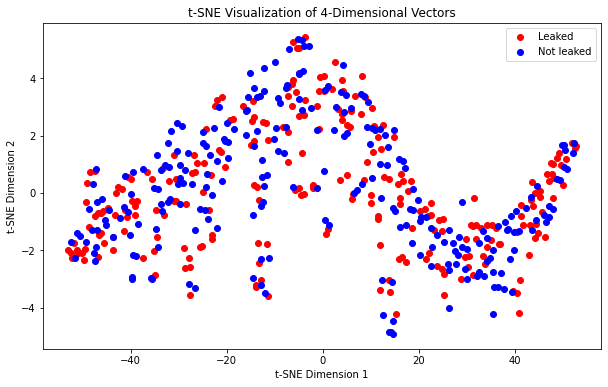

In [15]:
# t_SNE
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 유클리드 거리 계산 함수 정의
def calculate_euclidean_distances(client_file, dictionary_file):
    # 변환된 파일을 읽어옵니다.
    client_data = pd.read_csv(client_file)
    dictionary_data = pd.read_csv(dictionary_file)
    
    # 데이터 포인트 간의 유클리드 거리를 계산합니다.
    distances = euclidean_distances(client_data.values, dictionary_data.values)
    
    # top@1 score를 뺀 후 4차원 벡터화
    top1_scores = distances[:, 0]
    top5_scores = np.sort(distances, axis=1)[:, :5]
    top5_minus_top1 = top5_scores - top1_scores[:, np.newaxis]
    
    return top5_minus_top1

# 변환된 파일 경로
dictionary_file = "Dictionary_smashed_data.csv"

# t-SNE를 위한 4차원 벡터 계산
vectors_list = []
for i in range(10, 11):
    client_file = f'Client_smashed_data_epoch{i}.csv'
    vectors = calculate_euclidean_distances(client_file, dictionary_file)
    print(vectors)
    vectors_list.append(vectors)

# 리스트를 배열로 변환
vectors_array = np.concatenate(vectors_list, axis=0)

# t-SNE를 적용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
transformed_vectors = tsne.fit_transform(vectors_array)

# 첫 번째부터 250번째 벡터까지 빨간색, 이후는 파란색으로 점을 찍어 시각화
plt.figure(figsize=(10, 6))
plt.scatter(transformed_vectors[:250, 0], transformed_vectors[:250, 1], color='red', label='Leaked')
plt.scatter(transformed_vectors[250:, 0], transformed_vectors[250:, 1], color='blue', label='Not leaked')
plt.title('t-SNE Visualization of 4-Dimensional Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()
